# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data

In [7]:
london_bikes = pd.read_csv("./data/london_bikes.csv")
london_bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [8]:
titanic = pd.read_csv("./data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
energy = pd.read_csv("./data/US_energy_sector.csv")
energy.head()

,Month,All,Coal,Natural gas,Nuclear,Hydroelectric,Wind,Solar
0,Jan-01,332493.160,177287.111,42388.663,68707.077,18852.048,389.250,NaN
1,Feb-01,282940.198,149735.484,37966.927,61272.407,17472.889,431.242,NaN
2,Mar-01,300706.544,155269.011,44364.414,62140.712,20477.189,532.120,NaN
3,Apr-01,278078.871,140670.654,45842.746,56003.026,18012.994,684.695,NaN
4,May-01,300491.621,151592.914,50934.205,61512.445,19175.635,635.029,NaN


# Scatter plot

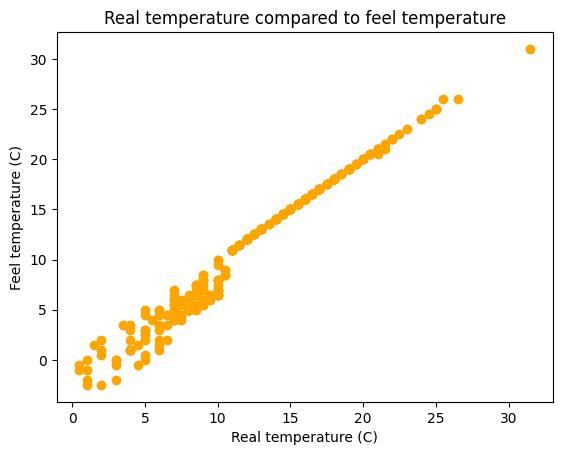

In [9]:
subset = london_bikes.sample(300)

plt.scatter(
    subset["t1"],
    subset["t2"],
    color = "orange"
)
plt.title("Real temperature compared to feel temperature")
plt.xlabel("Real temperature (C)")
plt.ylabel("Feel temperature (C)")
plt.show()

# Pie vs. Bar plot comparison

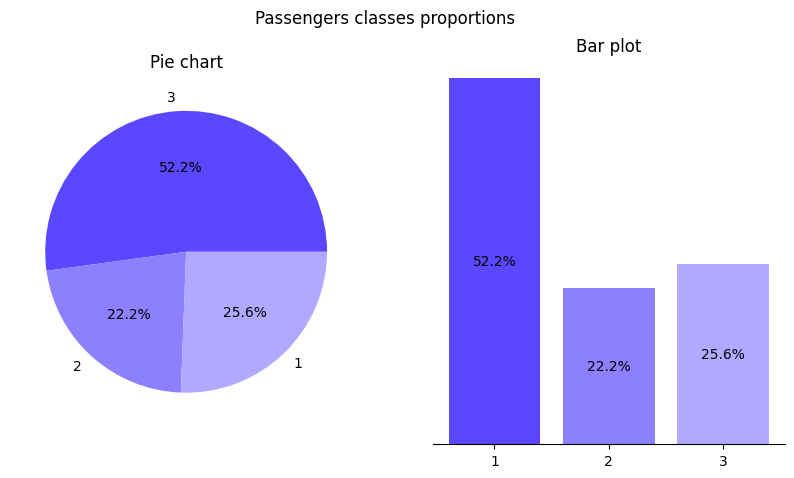

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

percentages = [len(titanic[titanic["Pclass"] == pc])/len(titanic) for pc in titanic["Pclass"].unique()]

ax[0].pie(
    percentages,
    labels = titanic["Pclass"].unique(),
    autopct = "%1.1f%%",
    colors = ["#5a47ff", "#8d80ff", "#b1a8ff"]
)
ax[0].set_title("Pie chart")

ax[1].bar(
    np.arange(3),
    percentages,
    color = ["#5a47ff", "#8d80ff", "#b1a8ff"]
)
for i, perc in enumerate(percentages):
    ax[1].text(i, perc/2, f"{perc*100:.1f}%", ha="center", va="center")
ax[1].set_title("Bar plot")
ax[1].spines["top"].set_visible(False)
ax[1].spines["left"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].set_yticks([])
ax[1].set_xticks(np.arange(3), np.arange(1, 4))

fig.suptitle("Passengers classes proportions")
plt.show()

# Line/Area plot

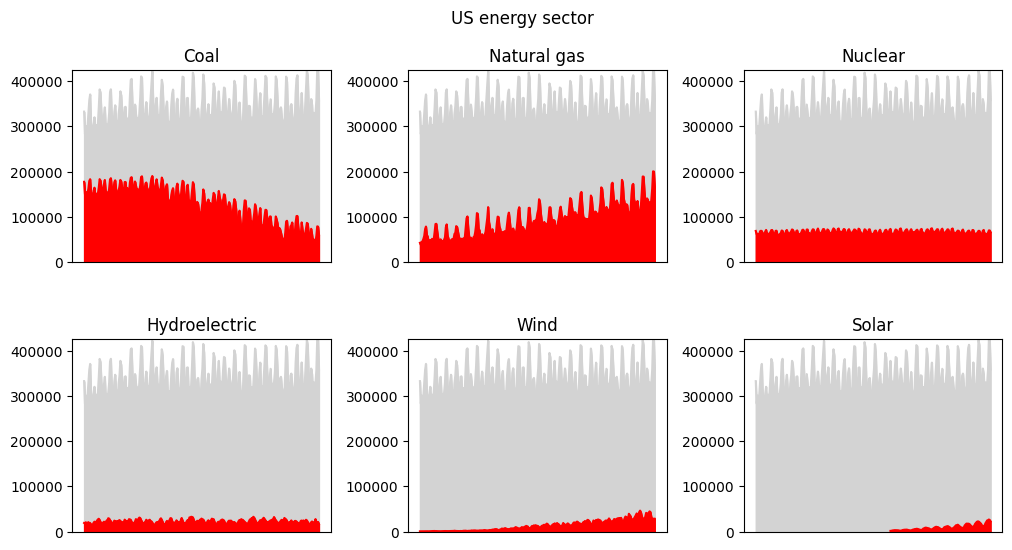

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

columns = energy.columns[2:]
all_fules = energy["All"]

for r in range(2):
    for c in range(3):
        column_name = columns[r*3 + c]
        ax[r][c].set_title(column_name)
        ax[r][c].plot(energy["All"], color="lightgray")
        ax[r][c].fill_between(np.arange(len(energy)), np.zeros(len(energy)), all_fules, color="lightgray")
        ax[r][c].set_ylim(0, max(all_fules))
        ax[r][c].plot(energy[column_name], color="red")
        ax[r][c].fill_between(np.arange(len(energy)), np.zeros(len(energy)), energy[column_name], color="red")
        ax[r][c].set_xticks([])

fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle("US energy sector")
plt.show()